In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import glob
import re
import datetime
from datetime import datetime
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean
from numpy import std
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from numpy import exp
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

import category_encoders as ce

from numpy import percentile

import scipy as sc
from pandas import read_csv


from sklearn.preprocessing import PowerTransformer

Načítanie .csv súborov, ich spojenie podľa atribútov name a address a vyhodenie zbytočných atribútov

In [635]:
df_other_train = read_csv("data/other_train.csv")
df_personal_train = read_csv("data/personal_train.csv")
df_other_valid = read_csv("data/other_valid.csv")
df_personal_valid = read_csv("data/personal_valid.csv")

df_merged1 = pd.merge(df_personal_train, df_other_train, on=['name', 'address'])
df_merged2 = pd.merge(df_other_valid, df_personal_valid, on=['name', 'address'])

df_merged = df_merged1.merge(df_merged2, how='outer')

df_merged = df_merged.drop('Unnamed: 0_x', 1)
df_merged = df_merged.drop('Unnamed: 0_y', 1)

df_merged

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,White,Married-civ-spouse,Transport-moving,FALSE,11.0,...,0.0,Assoc-voc,241259.0,0.0,<=50K,"{'mean_glucose':'132.9296875','std_glucose':'6...",United-States,40.0,0.0,Private
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,Black,Divorced,Other-service,f,9.0,...,0.0,HS-grad,172232.0,0.0,<=50K,"{'mean_glucose':'103.1171875','std_glucose':'-...",United-States,30.0,0.0,Private
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,White,Married-civ-spouse,Exec-managerial,f,10.0,...,0.0,Some-college,345705.0,0.0,<=50K,"{'mean_glucose':'125.5390625','std_glucose':'5...",United-States,40.0,0.0,Private
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,Amer-Indian-Eskimo,Never-married,Handlers-cleaners,f,9.0,...,0.0,HS-grad,149297.0,0.0,<=50K,"{'mean_glucose':'136.0859375','std_glucose':'4...",United-States,30.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11,White,Never-married,Craft-repair,f,10.0,...,0.0,Some-college,253262.0,0.0,<=50K,"{'mean_glucose':'99.328125','std_glucose':'38....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60,Male,1959-09-21,White,Married-civ-spouse,Prof-specialty,f,15.0,...,0.0,Prof-school,132601.0,1.0,>50K,"{'mean_glucose':'28.1953125','std_glucose':'39...",United-States,40.0,0.0,Private
5340,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43,Male,76-09-04,White,Married-civ-spouse,Transport-moving,FALSE,9.0,...,0.0,HS-grad,85434.0,0.0,<=50K,"{'mean_glucose':'110.0546875','std_glucose':'4...",United-States,40.0,0.0,Private
5341,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50,Male,1968-12-02,White,Married-civ-spouse,Prof-specialty,f,13.0,...,5178.0,Bachelors,174575.0,0.0,>50K,"{'mean_glucose':'159.078125','std_glucose':'39...",United-States,40.0,0.0,Local-gov
5342,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49,Female,1970-04-05,White,Divorced,Sales,f,9.0,...,0.0,HS-grad,148903.0,0.0,<=50K,"{'mean_glucose':'116.46875','std_glucose':'35....",United-States,40.0,0.0,private


In [636]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0_x    3983 non-null   int64  
 1   name            3983 non-null   object 
 2   address         3983 non-null   object 
 3   age             3983 non-null   int64  
 4   sex             3983 non-null   object 
 5   date_of_birth   3983 non-null   object 
 6   Unnamed: 0_y    3983 non-null   int64  
 7   race            3691 non-null   object 
 8   marital-status  3970 non-null   object 
 9   occupation      3961 non-null   object 
 10  pregnant        3969 non-null   object 
 11  education-num   3961 non-null   float64
 12  relationship    3954 non-null   object 
 13  capital-gain    3969 non-null   float64
 14  education       3972 non-null   object 
 15  fnlwgt          3968 non-null   float64
 16  class           3960 non-null   float64
 17  income          3972 non-null   o

Funkcia, ktorá nahradí chýbajúce hodnoty v stĺpci column modusom (najviac vyskytovaný element).

In [637]:
def get_mode(data_frame, column):
    data = data_frame[column].values.reshape(-1, 1)
    imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    data_frame[column] = imp.fit_transform(data)
    return data_frame

Funkcia, ktorá nahradí chýbajúce hodnoty v stĺpci column mediánom.

In [638]:
def get_median(data_frame, column):
    median = data_frame[column].median()
    data_frame[column].fillna(median, inplace = True)
    return data_frame

Funkcia, ktorá nahradí chýbajúce hodnoty v stĺpci column priemerom.

In [639]:
def get_mean(data_frame, column):
    mean = data_frame[column].mean()
    data_frame[column].fillna(mean, inplace = True)
    return data_frame

In [640]:
 def fill_median(data_frame):
    data_frame = get_median(data_frame, "mean_glucose")
    data_frame = get_median(data_frame, "std_glucose")
    data_frame = get_median(data_frame, "kurtosis_glucose")
    data_frame = get_median(data_frame, "skewness_glucose")
    data_frame = get_median(data_frame, "mean_oxygen")
    data_frame = get_median(data_frame, "std_oxygen")
    data_frame = get_median(data_frame, "kurtosis_oxygen")
    data_frame = get_median(data_frame, "skewness_oxygen")
    
    data_frame = get_median(data_frame, "education-num")
    data_frame = get_median(data_frame, "capital-gain")
    data_frame = get_median(data_frame, "fnlwgt")
    data_frame = get_median(data_frame, "hours-per-week")
    data_frame = get_median(data_frame, "capital-loss")
    
    return data_frame

In [641]:
 def fill_mode(data_frame):
    data_frame = get_mode(data_frame, "race")
    data_frame = get_mode(data_frame, "marital-status")
    data_frame = get_mode(data_frame, "occupation")
    data_frame = get_mode(data_frame, "pregnant")
    data_frame = get_mode(data_frame, "relationship")
    data_frame = get_mode(data_frame, "education")
    data_frame = get_mode(data_frame, "income")
    data_frame = get_mode(data_frame, "native-country")
    data_frame = get_mode(data_frame, "workclass")
    
    data_frame = get_mode(data_frame, "class")
    
    return data_frame

In [642]:
def get_zip(data_frame, column):
    for i in range(len(data_frame[column])):
        zipcode = str(data_frame[column][i])
        data_frame.loc[i, column] = zipcode[len(zipcode) - 5:len(zipcode)]
    data_frame[column] = data_frame[column].astype('int')
    return data_frame

In [643]:
def calculate_age(data_frame, date_of_birth, age):
    for i in range(len(data_frame[date_of_birth])):
        curr_age = int(data_frame[age][i])
        
        if curr_age < 0 or curr_age > 99:
            year = data_frame[date_of_birth][i]
            year = year[:4]            
            new_age = 2019 - int(year)
            
            if new_age < 0 or new_age > 99:
                data_frame = data_frame.drop(i)
            else:
                data_frame.loc[i, age] = str(new_age)
                
    data_frame = data_frame.reset_index()
    data_frame = data_frame.drop('index', 1)        
    return data_frame

In [644]:
# def replace_value(data_frame):
#     aggregation_functions = {'name': 'first', 'address': 'first', 'race': 'first', 'marital-status': 'first', 'occupation': 'first',
#                              'pregnant': 'first', 'education-num': 'first', 'relationship': 'first', 'capital-gain': 'first',
#                              'education': 'first', 'fnlwgt': 'first', 'class': 'first', 'income': 'first', 'medical_info': 'first',
#                             'native-country': 'first', 'hours-per-week': 'first', 'capital-loss': 'first', 'workclass': 'first'}
#     return data_frame.groupby(data_frame['name'], as_index=False).aggregate(aggregation_functions)

def unify_rows(data_frame):
    aggregation_functions = {}
    for col in data_frame.columns:
        aggregation_functions[col] = "first" 

    return data_frame.groupby(data_frame['name'], as_index=False).aggregate(aggregation_functions)


In [645]:
def cleanse_some_values(data_frame, column, change_from, change_to):
    for i in range(len(change_from)):
        data_frame.loc[data_frame[column] == change_from[i], column] = change_to

In [646]:
# def unify_values(data_frame):
#     unify_ppl = Pipeline([
#                     ('1. step',  cleanse_some_values(data_frame, 'pregnant', ["F", "FALSE", "f"], 0)),
#                     ('2. step', cleanse_some_values(data_frame, 'pregnant', ["T", "TRUE", "t"], 1)),

#                     ('3. step', cleanse_some_values(data_frame, 'marital-status', [" Widowed", " Never-married", " Divorced"], 0)),
#                     ('4. step',cleanse_some_values(data_frame, 'marital-status', [" Married-civ-spouse", " Separated", " Married-AF-spouse", " Married-spouse-absent"], 1)),

#                     ('5. step', cleanse_some_values(data_frame, 'education', [" 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th"], 0)),
#                     ('6. step', cleanse_some_values(data_frame, 'education', [" Bachelors", " Masters", " Doctorate"], 1)),
#                     ('7. step', cleanse_some_values(data_frame, 'education', [" Assoc-voc", " HS-grad", " Prof-school", " Assoc-acdm", " Some-college"], 2)),
#                     ('8. step', cleanse_some_values(data_frame, 'education', [" Preschool"], 3)),

#                     ('9. step', cleanse_some_values(data_frame, 'workclass', [" Private"], "private")),
#                     ('10. step', cleanse_some_values(data_frame, 'workclass', [" Self-emp-not-inc", " Self-emp-inc", "self-emp-inc", "self-emp-not-inc"], "self-emp")),
#                     ('11. step', cleanse_some_values(data_frame, 'workclass', [" Never-worked", " Without-pay"], "not-working")),
#                     ('12. step', cleanse_some_values(data_frame, 'workclass', [" Local-gov", "local-gov", " State-gov", "state-gov", " Federal-gov", "federal-gov"], "government")),
#                     ('13. step', cleanse_some_values(data_frame, 'workclass', [" ?", "?"], np.nan)),
                    
# #                     ('14. step', cleanse_some_values(data_frame, 'sex', [" Female"], 0)),
# #                     ('15. step', cleanse_some_values(data_frame, 'sex', [" Male"], 1)),
        
# #                     ('16. step', cleanse_some_values(data_frame, 'race', [" White"], 0)),
# #                     ('17. step', cleanse_some_values(data_frame, 'race', [" Asian-Pac-Islander"], 1)),
# #                     ('18. step', cleanse_some_values(data_frame, 'race', [" Black"], 2)),
# #                     ('19. step', cleanse_some_values(data_frame, 'race', [" Other"], 3)),
# #                     ('20. step', cleanse_some_values(data_frame, 'race', [" Amer-Indian-Eskimo"], 4)),
# #                     ('21. step', cleanse_some_values(data_frame, 'race', ["??"], np.nan)),
        
# #                     ('22. step', cleanse_some_values(data_frame, 'relationship', [" Own-child"], 0)),
# #                     ('23. step', cleanse_some_values(data_frame, 'relationship', [" Husband"], 1)),
# #                     ('24. step', cleanse_some_values(data_frame, 'relationship', [" Not-in-family"], 2)),
# #                     ('25. step', cleanse_some_values(data_frame, 'relationship', [" Wife"], 3)),
# #                     ('26. step', cleanse_some_values(data_frame, 'relationship', [" Other-relative"], 4)),
# #                     ('27. step', cleanse_some_values(data_frame, 'relationship', [" Unmarried"], 5)),
        
# #                     ('28. step', cleanse_some_values(data_frame, 'income', [" <=50K"], 0)),
# #                     ('29. step', cleanse_some_values(data_frame, 'income', [" >50K"], 1))
#                     ])
#     unify_ppl = unify_ppl.fit(data_frame)
#     data_frame = unify_ppl.transform(data_frame)
#     return data_frame

In [647]:

def unify_values(data_frame):
    unify_ppl = Pipeline([
                    ('1. step',  cleanse_some_values(data_frame, 'pregnant', ["F", "FALSE"], "f")),
                    ('2. step', cleanse_some_values(data_frame, 'pregnant', ["T", "TRUE"], "t")),

                    ('3. step', cleanse_some_values(data_frame, 'marital-status', [" Widowed", " Never-married", " Divorced"], "single")),
                    ('4. step',cleanse_some_values(data_frame, 'marital-status', [" Married-civ-spouse", " Separated", " Married-AF-spouse", " Married-spouse-absent"], "married")),

                    ('5. step', cleanse_some_values(data_frame, 'education', [" 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th"], "Primary school")),
                    ('6. step', cleanse_some_values(data_frame, 'education', [" Bachelors", " Masters", " Doctorate"], "College")),
                    ('7. step', cleanse_some_values(data_frame, 'education', [" Assoc-voc", " HS-grad", " Prof-school", " Assoc-acdm", " Some-college"], "Highschool")),
                    ('8. step', cleanse_some_values(data_frame, 'education', [" Preschool"], "Preschool")),

                    ('9. step', cleanse_some_values(data_frame, 'workclass', [" Private"], "private")),
                    ('10. step', cleanse_some_values(data_frame, 'workclass', [" Self-emp-not-inc", " Self-emp-inc", "self-emp-inc", "self-emp-not-inc"], "self-emp")),
                    ('11. step', cleanse_some_values(data_frame, 'workclass', [" Never-worked", " Without-pay"], "not-working")),
                    ('12. step', cleanse_some_values(data_frame, 'workclass', [" Local-gov", "local-gov", " State-gov", "state-gov", " Federal-gov", "federal-gov"], "government")),
                    ('13. step', cleanse_some_values(data_frame, 'workclass', [" ?", "?"], np.nan))
                    ])
    unify_ppl = unify_ppl.fit(data_frame)
    data_frame = unify_ppl.transform(data_frame)
    return data_frame


In [648]:
# def change_date_format(data_frame, column):
#     for i in range(len(data_frame[column])):
#         date_format = data_frame[column][i].replace('/', '-')
#         data_frame.loc[i, column] = date_format[:10]
#     return data_frame

def change_date_format(data_frame, column):
    for i in range(len(data_frame[column])):
        date_format = str(data_frame[column][i])
        date_format = date_format.replace('/', '-')
        if date_format[2] == '-' and len(date_format) < 10:
            temp_year = int(date_format[:2])
            if(temp_year <= 20):
                if(temp_year < 10):
                    year = '200'+str(temp_year)
                else:
                    year = '20'+str(temp_year)
            else:
                year = '19'+str(temp_year)
            data_frame.loc[i, column] = year+date_format[2:10]
        elif date_format[2] == '-' and len(date_format) == 10:
            day = date_format[:2]
            month = date_format[3:5]
            year = date_format[6:10]
            data_frame.loc[i, column] = year+'-'+month+'-'+day
        else:
            data_frame.loc[i, column] = date_format[:10]
    return data_frame

In [649]:
def remove_outliers(data_frame, column):
    a = data_frame[column]
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    outliers = a[(a > upper) | (a < lower)]
    data_frame = data_frame.drop(outliers.index)
    return data_frame

In [650]:
def man_not_pregnant(data_frame, sex, pregnant):
    for i in range(len(data_frame[sex])):
        if(data_frame[sex][i] == " Male") and data_frame[pregnant][i] != "f":
            data_frame.loc[i, pregnant] = "f"
    return data_frame

In [651]:
def remove_outliers(data_frame, column, koeficient):
    seed(1)
    data = data_frame[column]
    sns.distplot(data)

    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

    # identify outliers
    outliers = data[(data > upper) | (data < lower)]
    print('Identified outliers: %d' % len(outliers))

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print('Non-outlier observations: %d' % len(outliers_removed))

    sns.distplot(outliers_removed)
    
    data_frame = data_frame.drop(outliers.index)
    return data_frame

In [652]:
def replace_outliers(data_frame, column):
    seed(1)
    data = data_frame[column]
    sns.distplot(data)
    print('len=', len(data))

    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

    # identify outliers
    outliers = [x for x in data if x < lower or x > upper] 
    print('Identified outliers: %d' % len(outliers))

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print('Non-outlier observations: %d' % len(outliers_removed))
    
#     data_frame[column] = data
    sns.distplot(outliers_removed)
    return outliers_removed

In [653]:
def transform_data(column):
    # generate gaussian data sample
    data = df_merged[column].values.reshape(-1, 1)

    # # add a skew to the data distribution
    # data = exp(data)

    # histogram of the raw data with a skew
    pyplot.hist(data, bins=25)

    # reshape data to have rows and columns
    # data = data.reshape((len(data),1))

    # power transform the raw data
    power = PowerTransformer(method='yeo-johnson', standardize=True) 
    data_trans = power.fit_transform(data)

    # histogram of the transformed data
    pyplot.hist(data_trans, bins=25)
    return data_trans

In [654]:
def encoding(data_frame, column, typ):
    data = data_frame[column]
#     ce_ordinal = ce.OrdinalEncoder(cols=[column])
#     data_frame[column] = ce_ordinal.fit_transform(data)

    if typ == 0:
        ce_ordinal = ce.OneHotEncoder(cols=[column])
        data_frame[column] = ce_ordinal.fit_transform(data)
        
    elif typ == 1:
        ce_ordinal = ce.OrdinalEncoder(cols=[column])
        data_frame[column] = ce_ordinal.fit_transform(data)
    
    return data_frame

In [655]:
def encode_pregnant(data_frame):
    cleanse_some_values(data_frame, 'pregnant', ["f"], 0)
    cleanse_some_values(data_frame, 'pregnant', ["t"], 1)
    data_frame['pregnant'] = data_frame['pregnant'].astype('int')
    return data_frame

In [656]:
def encode_objects(data_frame):
    data_frame = encoding(data_frame, 'sex', 0)
    data_frame = encoding(data_frame, 'race', 1)
    data_frame = encoding(data_frame, 'marital-status', 1)
    data_frame = encoding(data_frame, 'occupation', 1)
    data_frame = encode_pregnant(data_frame)
    data_frame = encoding(data_frame, 'relationship', 1)
    data_frame = encoding(data_frame, 'education', 1)
    data_frame = encoding(data_frame, 'income', 0)
    data_frame = encoding(data_frame, 'native-country', 1)
    data_frame = encoding(data_frame, 'workclass', 1)
    
    return data_frame

In [657]:
df_merged1 = unify_rows(df_merged1)

In [658]:
# dir_in = 'data'
# filenames = [i for i in glob.glob(dir_in + '/*')]
# print(*filenames, sep='\n')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 0 to 5343
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5344 non-null   object 
 1   address         5344 non-null   object 
 2   age             5344 non-null   int64  
 3   sex             5344 non-null   object 
 4   date_of_birth   5344 non-null   object 
 5   race            4939 non-null   object 
 6   marital-status  5318 non-null   object 
 7   occupation      5305 non-null   object 
 8   pregnant        5313 non-null   object 
 9   education-num   5304 non-null   float64
 10  relationship    5295 non-null   object 
 11  capital-gain    5311 non-null   float64
 12  education       5317 non-null   object 
 13  fnlwgt          5317 non-null   float64
 14  class           5306 non-null   float64
 15  income          5313 non-null   object 
 16  medical_info    5312 non-null   object 
 17  native-country  5315 non-null   o

In [659]:
medical_line = df_merged["medical_info"].str.replace(':', ',').str.replace("'", '').str.replace("{", '').str.replace("}", '')
medical_elements = medical_line.str.split(",", -1, expand = True)

diabetes_dataset = {}

for index in range(0, medical_elements.shape[1]):
    i = medical_elements[0][0]
    if(index % 2 == 0):
        diabetes_dataset[medical_elements[index][0]] = medical_elements[index + 1]
        
diabetes_dataset = pd.DataFrame(diabetes_dataset)
df_merged = pd.concat([df_merged, diabetes_dataset.reindex(df_merged.index)], axis = 1)
df_merged = df_merged.drop(columns = ['medical_info'])

In [660]:
df_merged['mean_glucose'] = df_merged['mean_glucose'].astype(float)
df_merged['std_glucose'] = df_merged['std_glucose'].astype(float)
df_merged['kurtosis_glucose'] = df_merged['kurtosis_glucose'].astype(float)
df_merged['skewness_glucose'] = df_merged['skewness_glucose'].astype(float)
df_merged['mean_oxygen'] = df_merged['mean_oxygen'].astype(float)
df_merged['std_oxygen'] = df_merged['std_oxygen'].astype(float)
df_merged['kurtosis_oxygen'] = df_merged['kurtosis_oxygen'].astype(float)
df_merged['skewness_oxygen'] = df_merged['skewness_oxygen'].astype(float)

In [661]:
# df_merged.set_index('index', inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 0 to 5343
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5344 non-null   object 
 1   address           5344 non-null   object 
 2   age               5344 non-null   int64  
 3   sex               5344 non-null   object 
 4   date_of_birth     5344 non-null   object 
 5   race              4939 non-null   object 
 6   marital-status    5318 non-null   object 
 7   occupation        5305 non-null   object 
 8   pregnant          5313 non-null   object 
 9   education-num     5304 non-null   float64
 10  relationship      5295 non-null   object 
 11  capital-gain      5311 non-null   float64
 12  education         5317 non-null   object 
 13  fnlwgt            5317 non-null   float64
 14  class             5306 non-null   float64
 15  income            5313 non-null   object 
 16  native-country    5315 non-null   object 


In [662]:
df_merged['pregnant'].unique()

array(['FALSE', 'f', 'F', 't', 'TRUE', nan, 'T'], dtype=object)

In [663]:
# def unify_values(data_frame):
#     unify_ppl = Pipeline([
#                     ('1. step',  cleanse_some_values(data_frame, 'pregnant', ["F", "FALSE"], "f")),
#                     ('2. step', cleanse_some_values(data_frame, 'pregnant', ["T", "TRUE"], "t")),

#                     ('3. step', cleanse_some_values(data_frame, 'marital-status', [" Widowed", " Never-married", " Divorced"], "single")),
#                     ('4. step',cleanse_some_values(data_frame, 'marital-status', [" Married-civ-spouse", " Separated", " Married-AF-spouse", " Married-spouse-absent"], "married")),

#                     ('5. step', cleanse_some_values(data_frame, 'education', [" 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th"], "Primary school")),
#                     ('6. step', cleanse_some_values(data_frame, 'education', [" Bachelors", " Masters", " Doctorate"], "College")),
#                     ('7. step', cleanse_some_values(data_frame, 'education', [" Assoc-voc", " HS-grad", " Prof-school", " Assoc-acdm", " Some-college"], "Highschool")),
#                     ('8. step', cleanse_some_values(data_frame, 'education', [" Preschool"], "Preschool")),

#                     ('9. step', cleanse_some_values(data_frame, 'workclass', [" Private"], "private")),
#                     ('10. step', cleanse_some_values(data_frame, 'workclass', [" Self-emp-not-inc", " Self-emp-inc", "self-emp-inc", "self-emp-not-inc"], "self-emp")),
#                     ('11. step', cleanse_some_values(data_frame, 'workclass', [" Never-worked", " Without-pay"], "not-working")),
#                     ('12. step', cleanse_some_values(data_frame, 'workclass', [" Local-gov", "local-gov", " State-gov", "state-gov", " Federal-gov", "federal-gov"], "government")),
#                     ('13. step', cleanse_some_values(data_frame, 'workclass', [" ?", "?"], np.nan))
#                     ])
#     unify_ppl = unify_ppl.fit(data_frame)
#     data_frame = unify_ppl.transform(data_frame)
#     return data_frame

In [664]:
df_merged = unify_values(df_merged)

In [665]:
df_merged

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,White,married,Transport-moving,f,11.0,...,0.0,private,132.929688,60.867708,-0.436387,-0.688681,0.614548,9.263484,22.735642,567.160140
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,Black,single,Other-service,f,9.0,...,0.0,private,103.117188,-8305.388133,0.491895,-1.424907,106.815217,69.221315,0.481260,-0.990715
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,White,married,Exec-managerial,f,10.0,...,0.0,private,125.539062,54.159184,0.143624,-0.254129,130.118729,70.445567,-0.628429,-0.663865
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,Amer-Indian-Eskimo,single,Handlers-cleaners,f,9.0,...,0.0,private,136.085938,4868.248969,0.109994,-0.148005,20.709030,52.726139,2.394527,4.347367
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11,White,single,Craft-repair,f,10.0,...,0.0,private,99.328125,38.589812,0.616292,2.259311,1.601171,15.775832,11.327872,139.606718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60,Male,1959-09-21,White,married,Prof-specialty,f,15.0,...,0.0,private,28.195312,3921.376883,4.269629,18.154262,103.806020,85.647206,0.095444,-1.358248
5340,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43,Male,76-09-04,White,married,Transport-moving,f,9.0,...,0.0,private,110.054688,45.564053,0.379363,0.133880,1.261706,13.032154,13.294267,202.930061
5341,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50,Male,1968-12-02,White,married,Prof-specialty,f,13.0,...,0.0,government,159.078125,39.412405,-0.363835,1.141354,0.795987,9.677674,18.652776,427.256817
5342,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49,Female,1970-04-05,White,single,Sales,f,9.0,...,0.0,private,116.468750,35.632222,0.386352,2.199301,1.541806,14.173109,12.022914,164.296414


In [666]:
# cleanse_some_values(df_merged, 'pregnant', ["F", "FALSE"], "f")
# cleanse_some_values(df_merged, 'pregnant', ["T", "TRUE"], "t")

In [667]:
df_merged['marital-status'].unique()

array(['married', 'single', nan], dtype=object)

In [668]:
# cleanse_some_values(df_merged, 'marital-status', [" Widowed", " Never-married", " Divorced"], "single")
# cleanse_some_values(df_merged, 'marital-status', [" Married-civ-spouse", " Separated", " Married-AF-spouse", " Married-spouse-absent"], "married")

In [669]:
df_merged

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,White,married,Transport-moving,f,11.0,...,0.0,private,132.929688,60.867708,-0.436387,-0.688681,0.614548,9.263484,22.735642,567.160140
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,Black,single,Other-service,f,9.0,...,0.0,private,103.117188,-8305.388133,0.491895,-1.424907,106.815217,69.221315,0.481260,-0.990715
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,White,married,Exec-managerial,f,10.0,...,0.0,private,125.539062,54.159184,0.143624,-0.254129,130.118729,70.445567,-0.628429,-0.663865
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,Amer-Indian-Eskimo,single,Handlers-cleaners,f,9.0,...,0.0,private,136.085938,4868.248969,0.109994,-0.148005,20.709030,52.726139,2.394527,4.347367
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11,White,single,Craft-repair,f,10.0,...,0.0,private,99.328125,38.589812,0.616292,2.259311,1.601171,15.775832,11.327872,139.606718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60,Male,1959-09-21,White,married,Prof-specialty,f,15.0,...,0.0,private,28.195312,3921.376883,4.269629,18.154262,103.806020,85.647206,0.095444,-1.358248
5340,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43,Male,76-09-04,White,married,Transport-moving,f,9.0,...,0.0,private,110.054688,45.564053,0.379363,0.133880,1.261706,13.032154,13.294267,202.930061
5341,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50,Male,1968-12-02,White,married,Prof-specialty,f,13.0,...,0.0,government,159.078125,39.412405,-0.363835,1.141354,0.795987,9.677674,18.652776,427.256817
5342,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49,Female,1970-04-05,White,single,Sales,f,9.0,...,0.0,private,116.468750,35.632222,0.386352,2.199301,1.541806,14.173109,12.022914,164.296414


In [670]:
df_merged['education'].unique()

array(['Highschool', 'College', 'Primary school', 'Preschool', nan],
      dtype=object)

In [671]:
# cleanse_some_values(df_merged, 'education', [" 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th"], "Primary school")
# cleanse_some_values(df_merged, 'education', [" Bachelors", " Masters", " Doctorate"], "College")
# cleanse_some_values(df_merged, 'education', [" Assoc-voc", " HS-grad", " Prof-school", " Assoc-acdm", " Some-college"], "Highschool")
# df_merged.loc[df_merged['education'] == " Preschool", 'education'] = "Preschool"

In [672]:
df_merged['workclass'].unique()

array(['private', 'government', 'self-emp', nan, 'not-working'],
      dtype=object)

In [673]:
# cleanse_some_values(df_merged, 'workclass', [" Private"], "private")
# cleanse_some_values(df_merged, 'workclass', [" Self-emp-not-inc", " Self-emp-inc", "self-emp-inc", "self-emp-not-inc"], "self-emp")
# cleanse_some_values(df_merged, 'workclass', [" Never-worked", " Without-pay"], "not-working")
# cleanse_some_values(df_merged, 'workclass', [" Local-gov", "local-gov", " State-gov", "state-gov", " Federal-gov", "federal-gov"], "government")
# cleanse_some_values(df_merged, 'workclass', [" ?", "?"], np.nan)

In [674]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 0 to 5343
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5344 non-null   object 
 1   address           5344 non-null   object 
 2   age               5344 non-null   int64  
 3   sex               5344 non-null   object 
 4   date_of_birth     5344 non-null   object 
 5   race              4939 non-null   object 
 6   marital-status    5318 non-null   object 
 7   occupation        5305 non-null   object 
 8   pregnant          5313 non-null   object 
 9   education-num     5304 non-null   float64
 10  relationship      5295 non-null   object 
 11  capital-gain      5311 non-null   float64
 12  education         5317 non-null   object 
 13  fnlwgt            5317 non-null   float64
 14  class             5306 non-null   float64
 15  income            5313 non-null   object 
 16  native-country    5315 non-null   object 


In [675]:
df_merged = change_date_format(df_merged,'date_of_birth')

In [676]:
date_formats = df_merged.date_of_birth
date_formats = date_formats.str.replace('\d', '0')
date_formats.unique()

array(['0000-00-00'], dtype=object)

In [677]:
df_merged['date_of_birth']

0       1961-04-27
1       1976-09-12
2       1967-11-12
3       1953-06-02
4       1974-09-11
           ...    
5339    1959-09-21
5340    1976-09-04
5341    1968-12-02
5342    1970-04-05
5343    1944-03-24
Name: date_of_birth, Length: 5344, dtype: object

In [678]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 0 to 5343
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5344 non-null   object 
 1   address           5344 non-null   object 
 2   age               5344 non-null   int64  
 3   sex               5344 non-null   object 
 4   date_of_birth     5344 non-null   object 
 5   race              4939 non-null   object 
 6   marital-status    5318 non-null   object 
 7   occupation        5305 non-null   object 
 8   pregnant          5313 non-null   object 
 9   education-num     5304 non-null   float64
 10  relationship      5295 non-null   object 
 11  capital-gain      5311 non-null   float64
 12  education         5317 non-null   object 
 13  fnlwgt            5317 non-null   float64
 14  class             5306 non-null   float64
 15  income            5313 non-null   object 
 16  native-country    5315 non-null   object 


In [679]:
df_merged

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,White,married,Transport-moving,f,11.0,...,0.0,private,132.929688,60.867708,-0.436387,-0.688681,0.614548,9.263484,22.735642,567.160140
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,Black,single,Other-service,f,9.0,...,0.0,private,103.117188,-8305.388133,0.491895,-1.424907,106.815217,69.221315,0.481260,-0.990715
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,White,married,Exec-managerial,f,10.0,...,0.0,private,125.539062,54.159184,0.143624,-0.254129,130.118729,70.445567,-0.628429,-0.663865
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,Amer-Indian-Eskimo,single,Handlers-cleaners,f,9.0,...,0.0,private,136.085938,4868.248969,0.109994,-0.148005,20.709030,52.726139,2.394527,4.347367
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974-09-11,White,single,Craft-repair,f,10.0,...,0.0,private,99.328125,38.589812,0.616292,2.259311,1.601171,15.775832,11.327872,139.606718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60,Male,1959-09-21,White,married,Prof-specialty,f,15.0,...,0.0,private,28.195312,3921.376883,4.269629,18.154262,103.806020,85.647206,0.095444,-1.358248
5340,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43,Male,1976-09-04,White,married,Transport-moving,f,9.0,...,0.0,private,110.054688,45.564053,0.379363,0.133880,1.261706,13.032154,13.294267,202.930061
5341,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50,Male,1968-12-02,White,married,Prof-specialty,f,13.0,...,0.0,government,159.078125,39.412405,-0.363835,1.141354,0.795987,9.677674,18.652776,427.256817
5342,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49,Female,1970-04-05,White,single,Sales,f,9.0,...,0.0,private,116.468750,35.632222,0.386352,2.199301,1.541806,14.173109,12.022914,164.296414


In [680]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 0 to 5343
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5344 non-null   object 
 1   address           5344 non-null   object 
 2   age               5344 non-null   int64  
 3   sex               5344 non-null   object 
 4   date_of_birth     5344 non-null   object 
 5   race              4939 non-null   object 
 6   marital-status    5318 non-null   object 
 7   occupation        5305 non-null   object 
 8   pregnant          5313 non-null   object 
 9   education-num     5304 non-null   float64
 10  relationship      5295 non-null   object 
 11  capital-gain      5311 non-null   float64
 12  education         5317 non-null   object 
 13  fnlwgt            5317 non-null   float64
 14  class             5306 non-null   float64
 15  income            5313 non-null   object 
 16  native-country    5315 non-null   object 


In [681]:
# df_merged = remove_outliers(df_merged, 'age')

In [682]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 0 to 5343
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5344 non-null   object 
 1   address           5344 non-null   object 
 2   age               5344 non-null   int64  
 3   sex               5344 non-null   object 
 4   date_of_birth     5344 non-null   object 
 5   race              4939 non-null   object 
 6   marital-status    5318 non-null   object 
 7   occupation        5305 non-null   object 
 8   pregnant          5313 non-null   object 
 9   education-num     5304 non-null   float64
 10  relationship      5295 non-null   object 
 11  capital-gain      5311 non-null   float64
 12  education         5317 non-null   object 
 13  fnlwgt            5317 non-null   float64
 14  class             5306 non-null   float64
 15  income            5313 non-null   object 
 16  native-country    5315 non-null   object 


In [683]:
column = df_merged["age"]
max_value = column.max()
print(max_value)

113


Odstránenie outliers v atribúte age

In [684]:
data_frame = man_not_pregnant(df_merged, 'sex', 'pregnant')

In [685]:
print(df_merged.loc[292])

name                                            Robert Lucia
address             3768 Jackson Dam\r\nNew Nicole, AK 21471
age                                                       24
sex                                                   Female
date_of_birth                                     1995-02-10
race                                                   White
marital-status                                        single
occupation                                     Other-service
pregnant                                                   f
education-num                                             10
relationship                                   Not-in-family
capital-gain                                               0
education                                         Highschool
fnlwgt                                                190423
class                                                      0
income                                                 <=50K
native-country          

In [686]:
df_merged["std_glucose"].isnull().sum()

564

In [687]:
# data = df_merged["std_glucose"].values.reshape(-1, 1)
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(data)

# df_merged["std_glucose"] = imp_mean.transform(data)

In [688]:
df_merged["std_glucose"].head(500)

0        60.867708
1     -8305.388133
2        54.159184
3      4868.248969
4        38.589812
          ...     
495      44.319673
496            NaN
497      51.367709
498      45.736953
499      43.619403
Name: std_glucose, Length: 500, dtype: float64

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

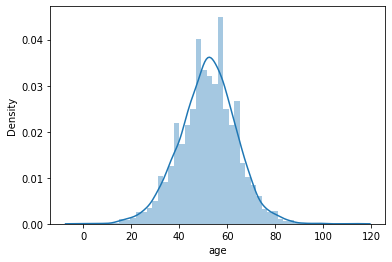

In [689]:
sns.distplot(df_merged['age'])

In [690]:
# from numpy import exp
# from numpy.random import randn
# from sklearn.preprocessing import PowerTransformer
# from matplotlib import pyplot

# # generate gaussian data sample
# data = df_merged['age'].values.reshape(-1, 1)

# # histogram of the raw data with a skew
# pyplot.hist(data, bins=25)

# # reshape data to have rows and columns
# data = data.reshape(-1,1)

# # power transform the raw data
# power = PowerTransformer(method='box-cox', standardize=True) 
# data_trans = power.fit_transform(data)
 
# # histogram of the transformed data
# pyplot.hist(data_trans, bins=25) 

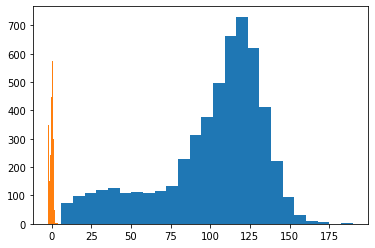

In [691]:
# Tu je ta transformacia, celkom sa mi zda ze v pohode je

df_merged['mean_glucose'] = transform_data("mean_glucose")




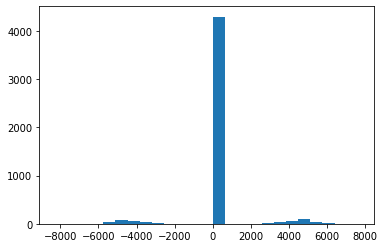

In [692]:
df_merged['std_glucose'] = transform_data("std_glucose")

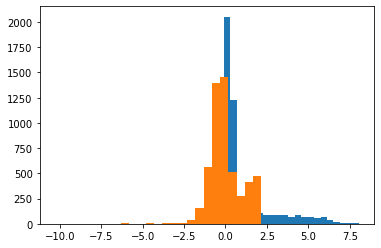

In [693]:
df_merged['kurtosis_glucose'] = transform_data("kurtosis_glucose")

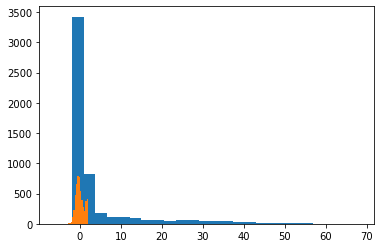

In [694]:
df_merged['skewness_glucose'] = transform_data("skewness_glucose")

## KNN

In [695]:
# summarize total missing
print("Missing: " + str(df_merged.isnull().sum().sum()))

temp = [col for col in df_merged.columns if df_merged[col].dtypes != 'O']

# define imputer
imputer = KNNImputer()

# fit on the dataset
imputer.fit(df_merged[temp])

# transform the dataset
Xtrans = imputer.transform(df_merged[temp])

# summarize total missing
print("Missing: " + str(sum(isnan(Xtrans).flatten())))

Missing: 1943
Missing: 0


In [696]:
# def remove_outliers(data_frame, column, koeficient):
#     seed(1)
#     data = data_frame[column]

#     # calculate summary statistics
#     data_mean, data_std = mean(data), std(data)
#     print('len=', len(data), 'mean=', data_mean, 'std=', data_std)

#     # define outliers
#     cut_off = data_std * koeficient
#     lower, upper = data_mean - cut_off, data_mean + cut_off 
#     print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

#     # identify outliers
#     outliers = [x for x in data if x < lower or x > upper] 
#     print('Identified outliers: %d' % len(outliers))

#     # remove outliers
#     data = [x for x in data if x >= lower and x <= upper]
# #     print('Non-outlier observations: %d' % len(outliers_removed))
#     print('Non-outlier observations: %d' % len(data))

#     sns.distplot(data)
# #     sns.distplot(outliers_removed)
#     sns.distplot(data)
    
# #     data_frame = data_frame.drop(outliers.index)
#     return data
    
# #     return outliers_removed

In [697]:
# def remove_outliers(data_frame, column, koeficient):
#     seed(1)
#     data = data_frame[column]

#     # calculate summary statistics
#     data_mean, data_std = mean(data), std(data)
#     print('len=', len(data), 'mean=', data_mean, 'std=', data_std)

#     # define outliers
#     cut_off = data_std * koeficient
#     lower, upper = data_mean - cut_off, data_mean + cut_off 
#     print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

#     # identify outliers
# #     outliers = [x for x in data if x < lower or x > upper] 
#     outliers = data[(data > upper) | (data < lower)]
#     print('Identified outliers: %d' % len(outliers))

#     # remove outliers
#     outliers_removed = [x for x in data if x >= lower and x <= upper]
#     print('Non-outlier observations: %d' % len(outliers_removed))

#     sns.distplot(data)
#     sns.distplot(outliers_removed)
    
#     data_frame = data_frame.drop(outliers.index)
#     return data_frame
    
# #     return outliers_removed

In [698]:
# def remove_outliers(data_frame, column):
#     a = data_frame[column]
#     lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
#     upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
#     outliers = a[(a > upper) | (a < lower)]
#     data_frame = data_frame.drop(outliers.index)
#     return data_frame

In [699]:
# def remove_outliers(data_frame, column, koeficient):
#     seed(1)
#     data = data_frame[column]
#     sns.distplot(data)

#     # calculate interquartile range
#     q25, q75 = percentile(data, 20), percentile(data, 80)
#     iqr = q75 - q25
#     print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

#     # calculate the outlier cutoff
#     cut_off = iqr * 1.5
#     lower, upper = q25 - cut_off, q75 + cut_off
#     print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

#     # identify outliers
#     outliers = data[(data > upper) | (data < lower)]
#     print('Identified outliers: %d' % len(outliers))

#     # remove outliers
#     outliers_removed = [x for x in data if x >= lower and x <= upper] 
#     print('Non-outlier observations: %d' % len(outliers_removed))

#     sns.distplot(outliers_removed)
    
#     data_frame = data_frame.drop(outliers.index)
#     return data_frame

In [700]:
# df_merged['age'] = replace_outliers(df_merged, "age")

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

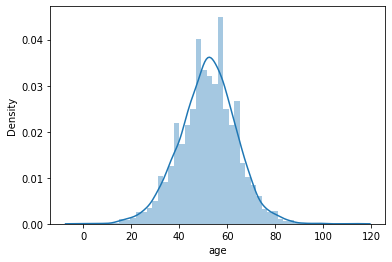

In [701]:
sns.distplot(df_merged['age'])

In [702]:
# df_merged = remove_outliers(df_merged, "age", 4)

In [703]:
print(df_merged['age'].min())

-1


 20  mean_glucose      5279 non-null   float64
 21  std_glucose       4751 non-null   float64
 22  kurtosis_glucose  5279 non-null   float64
 23  skewness_glucose  5279 non-null   float64
 24  mean_oxygen       5279 non-null   float64
 25  std_oxygen        5279 non-null   float64
 26  kurtosis_oxygen   5279 non-null   float64
 27  skewness_oxygen   5279 non-null   float64

In [704]:
# df_merged = remove_outliers(df_merged,"mean_glucose", 2)

In [705]:
# df_merged = remove_outliers(df_merged,"std_glucose", 4)

In [706]:
# df_merged = remove_outliers(df_merged,"kurtosis_glucose", 3)

In [707]:
# df_merged = remove_outliers(df_merged,"skewness_glucose", 3)

In [708]:
df_merged['std_glucose'].isnull().sum()

564

In [709]:
df_merged = fill_median(df_merged)

In [710]:
df_merged = fill_mode(df_merged)

In [711]:
df_merged = get_zip(df_merged,'address')

In [712]:
df_merged = get_mode(df_merged, "race")

In [713]:
df_merged = df_merged.drop('name', 1)

In [714]:
df_merged = calculate_age(df_merged, 'date_of_birth', 'age')

In [715]:
df_merged = df_merged.drop('date_of_birth', 1)

In [716]:
df_merged['occupation'].unique()

array([' Transport-moving', ' Other-service', ' Exec-managerial',
       ' Handlers-cleaners', ' Craft-repair', ' Prof-specialty',
       ' Protective-serv', ' Sales', ' Adm-clerical', ' ?',
       ' Machine-op-inspct', ' Farming-fishing', ' Tech-support',
       ' Priv-house-serv', ' Armed-Forces'], dtype=object)

In [717]:
# df_merged = encoding(df_merged, 'sex', 0)

In [718]:
# df_merged = encoding(df_merged, 'race', 1)

In [719]:
# df_merged = encoding(df_merged, 'marital-status', 1)

In [720]:
# df_merged = encoding(df_merged, 'occupation', 1)

In [721]:
# df_merged = encode_pregnant(df_merged)

In [722]:
# df_merged = encoding(df_merged, 'relationship', 1)

In [723]:
# df_merged = encoding(df_merged, 'education', 1)

In [724]:
# df_merged = encoding(df_merged, 'income', 0)

In [725]:
# df_merged = encoding(df_merged, 'native-country', 1)

In [726]:
# df_merged = encoding(df_merged, 'workclass', 1)

In [727]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5342 entries, 0 to 5341
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           5342 non-null   int32  
 1   age               5342 non-null   int64  
 2   sex               5342 non-null   object 
 3   race              5342 non-null   object 
 4   marital-status    5342 non-null   object 
 5   occupation        5342 non-null   object 
 6   pregnant          5342 non-null   object 
 7   education-num     5342 non-null   float64
 8   relationship      5342 non-null   object 
 9   capital-gain      5342 non-null   float64
 10  education         5342 non-null   object 
 11  fnlwgt            5342 non-null   float64
 12  class             5342 non-null   float64
 13  income            5342 non-null   object 
 14  native-country    5342 non-null   object 
 15  hours-per-week    5342 non-null   float64
 16  capital-loss      5342 non-null   float64


In [728]:
df_merged

,address,age,sex,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,53211,58,Male,White,married,Transport-moving,f,11.0,Husband,0.0,...,0.0,private,1.065226,-0.066309,-2.082986,-1.834307,0.614548,9.263484,22.735642,567.160140
1,57550,43,Female,Black,single,Other-service,f,9.0,Not-in-family,0.0,...,0.0,private,-0.089222,-4.250655,0.068411,-4.363994,106.815217,69.221315,0.481260,-0.990715
2,30614,51,Male,White,married,Exec-managerial,f,10.0,Other-relative,0.0,...,0.0,private,0.757142,-0.071384,-0.451760,-0.901851,130.118729,70.445567,-0.628429,-0.663865
3,30311,66,Male,Amer-Indian-Eskimo,single,Handlers-cleaners,f,9.0,Not-in-family,0.0,...,0.0,private,1.201123,4.036695,-0.514926,-0.730886,20.709030,52.726139,2.394527,4.347367
4,77139,45,Female,White,single,Craft-repair,f,10.0,Not-in-family,0.0,...,0.0,private,-0.218892,-0.083076,0.211127,0.644055,1.601171,15.775832,11.327872,139.606718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,81156,60,Male,White,married,Prof-specialty,f,15.0,Husband,0.0,...,0.0,private,-1.883953,3.205140,1.737792,1.623965,103.806020,85.647206,0.095444,-1.358248
5338,72779,43,Male,White,married,Transport-moving,f,9.0,Husband,0.0,...,0.0,private,0.158288,-0.077855,-0.077409,-0.374395,1.261706,13.032154,13.294267,202.930061
5339,73214,50,Male,White,married,Prof-specialty,f,13.0,Husband,5178.0,...,0.0,government,2.268075,-0.082461,-1.808466,0.289817,0.795987,9.677674,18.652776,427.256817
5340,19977,49,Female,White,single,Sales,f,9.0,Unmarried,0.0,...,0.0,private,0.398628,-0.085280,-0.067826,0.629619,1.541806,14.173109,12.022914,164.296414


In [729]:
df_merged = encode_objects(df_merged)

c:\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [730]:
df_merged

,address,age,sex,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,53211,58,1,1,1,1,0,11.0,1,0.0,...,0.0,1,1.065226,-0.066309,-2.082986,-1.834307,0.614548,9.263484,22.735642,567.160140
1,57550,43,0,2,2,2,0,9.0,2,0.0,...,0.0,1,-0.089222,-4.250655,0.068411,-4.363994,106.815217,69.221315,0.481260,-0.990715
2,30614,51,1,1,1,3,0,10.0,3,0.0,...,0.0,1,0.757142,-0.071384,-0.451760,-0.901851,130.118729,70.445567,-0.628429,-0.663865
3,30311,66,1,3,2,4,0,9.0,2,0.0,...,0.0,1,1.201123,4.036695,-0.514926,-0.730886,20.709030,52.726139,2.394527,4.347367
4,77139,45,0,1,2,5,0,10.0,2,0.0,...,0.0,1,-0.218892,-0.083076,0.211127,0.644055,1.601171,15.775832,11.327872,139.606718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,81156,60,1,1,1,6,0,15.0,1,0.0,...,0.0,1,-1.883953,3.205140,1.737792,1.623965,103.806020,85.647206,0.095444,-1.358248
5338,72779,43,1,1,1,1,0,9.0,1,0.0,...,0.0,1,0.158288,-0.077855,-0.077409,-0.374395,1.261706,13.032154,13.294267,202.930061
5339,73214,50,1,1,1,6,0,13.0,1,5178.0,...,0.0,2,2.268075,-0.082461,-1.808466,0.289817,0.795987,9.677674,18.652776,427.256817
5340,19977,49,0,1,2,8,0,9.0,6,0.0,...,0.0,1,0.398628,-0.085280,-0.067826,0.629619,1.541806,14.173109,12.022914,164.296414


In [731]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5342 entries, 0 to 5341
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           5342 non-null   int32  
 1   age               5342 non-null   int64  
 2   sex               5342 non-null   int64  
 3   race              5342 non-null   int32  
 4   marital-status    5342 non-null   int32  
 5   occupation        5342 non-null   int32  
 6   pregnant          5342 non-null   int32  
 7   education-num     5342 non-null   float64
 8   relationship      5342 non-null   int32  
 9   capital-gain      5342 non-null   float64
 10  education         5342 non-null   int32  
 11  fnlwgt            5342 non-null   float64
 12  class             5342 non-null   float64
 13  income            5342 non-null   int64  
 14  native-country    5342 non-null   int32  
 15  hours-per-week    5342 non-null   float64
 16  capital-loss      5342 non-null   float64


In [732]:
df_merged.to_csv(r'data/export.csv')